In [1]:
import sys

sys.path.append('../src/')
from config import cf
from functions import *

from functions_plot import *

import matplotlib
import yaml
import IPython.display as display
from PIL import Image

d:\anaconda3\envs\Python-R\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.1.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


#  Variables 

In [12]:
augmented = cf['augmented']
model_name = cf['model_name']
epochs = cf['epochs'] 

# Load images
main_path_test = cf["main_path_test"]
main_path_train = cf["main_path_train"]
main_path_val = cf["main_path_val"]
folders = cf["folders"]

# batch_size for training
b_size = cf["b_size"]

# Save figures
figs_folder = cf["figs_folder"]

# Load model
checkpoint_path = cf["checkpoint_path"]

# Load history.history
path_save_history = cf["path_save_history"]

# Results
path_save_results = cf['path_save_results']  

# Plot font size
font = cf["font"]
matplotlib.rc('font', **font)

model_name = model_name + '_epochs-%s'%epochs 

color_channels = 1 #color_mode = 'grayscale' in get_generator

# Load pre-trained model 

In [13]:
# Best model
model = get_saved_model(checkpoint_path + model_name + '_best_model.h5')

# <font color = 'red'> Load image </font>

In [14]:
img_path = main_path_test + 'COVID-19/images/covid_508.png'

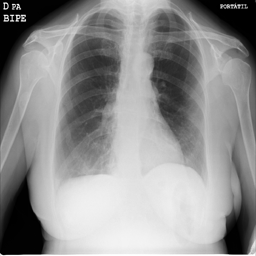

In [15]:
display.display(Image.open(img_path))

In [16]:
img = load_one_image_to_make_prediction(img_path)
print("Image Shape: ", img.shape)

prediction = model.predict(img)

y_pred = sigmoid_prediction_to_binary_class(prediction)

folders[y_pred[0]]

Image Shape:  (1, 256, 256, 1)


'COVID-19'

# <font color = 'red'> Acess model layers </font>

In [17]:
model_input = model.input
model_layers = model.layers

In [18]:
print('Input:') 
print(model_input)
print('\nLayers:')
model_layers

Input:
KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name='input'), name='input', description="created by layer 'input'")

Layers:


## Build a model that access the layer outputs

In [19]:
layer_outputs = [layer.output for layer in model_layers]
layer_outputs

[<KerasTensor: shape=(None, 256, 256, 1) dtype=float32 (created by layer 'input')>,
 <KerasTensor: shape=(None, 256, 256, 64) dtype=float32 (created by layer 'conv_1')>,
 <KerasTensor: shape=(None, 128, 128, 64) dtype=float32 (created by layer 'max_pooling_1')>,
 <KerasTensor: shape=(None, 128, 128, 64) dtype=float32 (created by layer 'dropout_1')>,
 <KerasTensor: shape=(None, 128, 128, 64) dtype=float32 (created by layer 'conv_2')>,
 <KerasTensor: shape=(None, 64, 64, 64) dtype=float32 (created by layer 'max_pooling_2')>,
 <KerasTensor: shape=(None, 64, 64, 64) dtype=float32 (created by layer 'dropout_2')>,
 <KerasTensor: shape=(None, 64, 64, 32) dtype=float32 (created by layer 'conv_3')>,
 <KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'max_pooling_3')>,
 <KerasTensor: shape=(None, 32768) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_1')>,
 <KerasTensor: shape=(None, 32) dtype=float32 (creat

In [20]:
model_features = Model(inputs=model_input,outputs=layer_outputs)

In [27]:
# Save the model display
path_save_fig = figs_folder + model_name + '_features'

display_model(model, path_save_fig)

==> Saving model display at ../output/figs/model_epochs-60_features


<Figure size 864x576 with 0 Axes>

## Extract the features

In [22]:
features = model_features.predict(img)

## Visualize

### Input (only 1 channel)


f1.shape:  (1, 256, 256, 1)
img shape (256, 256, 1)


Text(0.5, 0.98, 'input')

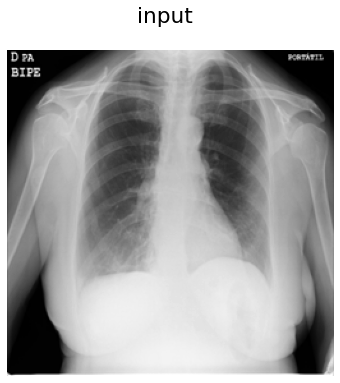

In [23]:
layer = 'input'
f1 = features[0]

print('\nf1.shape: ',f1.shape)

imgs = f1[0,:,:,:]
print('img shape', imgs.shape)

fig = plt.figure(figsize=(6,6))
for n in range(color_channels):
    plt.subplot(1,color_channels,n+1)
    plt.imshow(imgs[:,:,n],cmap='gray')
    plt.axis('off')
    
plt.subplots_adjust(wspace=0.01,hspace=0.01)  
plt.suptitle(layer)  

### First hidden layer


f1.shape:  (1, 128, 128, 64)
img shape (128, 128, 64)


Text(0.5, 0.98, 'conv_1')

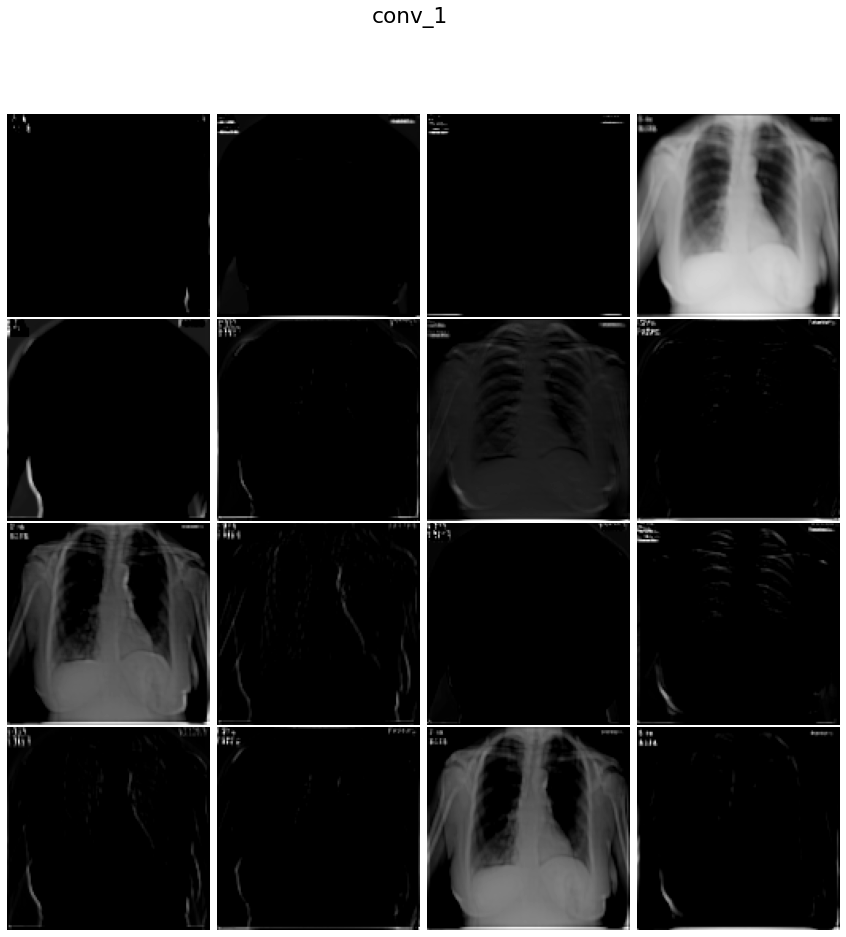

In [24]:
layer = 'conv_1'
f2 = features[2]

print('\nf1.shape: ',f2.shape)

imgs = f2[0,:,:,:]
print('img shape', imgs.shape)

fig = plt.figure(figsize=(15,15))

for n in range(16):
    plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n],cmap='gray')
    plt.axis('off')
    
plt.subplots_adjust(wspace=0.01,hspace=0.01)  
plt.suptitle(layer)   

## Max_Pooling Layer

In [25]:
layer = 'max_pooling_3'
model_features_max_pool = Model(inputs=model_input, outputs=model_features.get_layer(layer).output)

features_max_pool = model_features_max_pool.predict(img)


f1.shape:  (1, 32, 32, 32)
img shape (32, 32, 32)


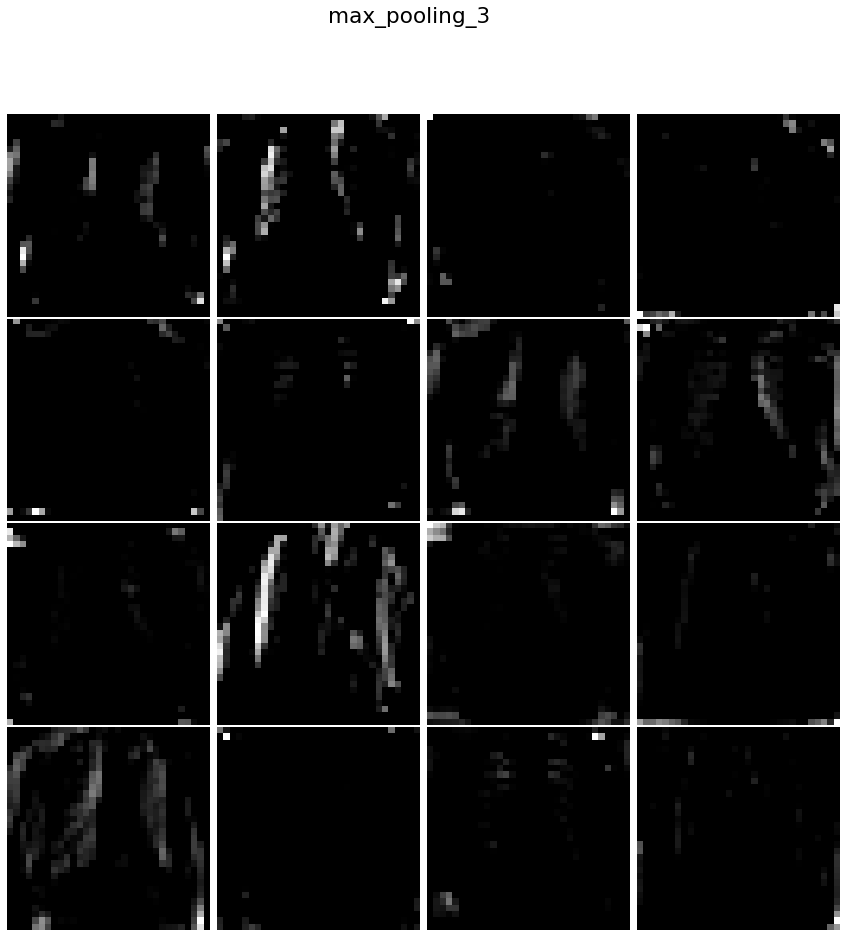

In [26]:
print('\nf1.shape: ',features_max_pool.shape)

imgs = features_max_pool[0,:,:,:]
print('img shape', imgs.shape)

fig = plt.figure(figsize=(15,15))

for n in range(16):
    plt.subplot(4,4,n+1)
    plt.imshow(imgs[:,:,n],cmap='gray')
    plt.axis('off')
plt.suptitle(layer)    
plt.subplots_adjust(wspace=0.01,hspace=0.01)  
